In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [10]:
data = pd.read_csv('history_export.txt', sep="|", header = None, encoding='utf-16-le')
data.columns = ["Time", "URL"]

In [11]:
data['Time'] = pd.to_datetime(data['Time'])

In [12]:
data.index = data['Time']
del data['Time']
#domainList = [0]*len(data)

In [5]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'danishv21@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [6]:

for idx in range(len(data)):
    print(idx)
    url = data.URL[idx]
    if(len(url)>5):
        try:
            r = requests.get(url, headers=headers)
        except:
            r = ''
            pass
        if(type(r)!=str):
            try:
                soup = BeautifulSoup(r.text, 'html.parser')
            except:
                pass
            if(len(soup('title'))>0):
                if(soup('title')[0].string is not None):
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()     
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
print(domainList)
data['Domain']=domainList
print(data.columns)
print(data.head())

[b'IIT Kanpur', b'IIT Kanpur', b'HTTP Status 405 \xe2\x80\x93 Method Not Allowed', b'OTS ERROR', 'Null', 'Null', b'ATOM OTS', b'ATOM OTS', b'IIT Kanpur', b'IIT Kanpur', b'IIT Kanpur', b'ATOM OTS', b'Case Compendium - PDFCOFFEE.COM', b'Case Compendium - PDFCOFFEE.COM', b'Case Compendium - PDFCOFFEE.COM', b'case compendium pdf download - Google Search', b'srcc case book - Google Search', b'Choose a Plan | Scribd', b'Case Compendium | PDF | Interest | Demand', b'Sign In - Google Accounts', b'Case Compendium | PDF | Interest | Demand', b'Case Library & Resources | 180 Degrees Consulting, SRCC', b'IITK Family Tree', b'RC - Openings - QnA', b'RC - Openings - QnA', b'RC - Company - Proforma', b'RC - Openings - QnA', b'RC - Openings - QnA', b'RC - Openings - QnA', b'RC - Openings - QnA', b'RC - Company - Proforma', b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail', b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail', b'IIT Kanpur Webmail :: Welcome to IIT Kanpur Webmail', b'IIT Kanpur 

In [14]:
data.to_csv('chrome_history.csv')

In [25]:
data = pd.read_csv('chrome_history.csv')
data.Time = pd.to_datetime(data.Time)
docs = data.Domain.unique()

In [26]:
data.head()

,Time,URL,Domain
0,2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0,b'IIT Kanpur'
1,2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0/,b'IIT Kanpur'
2,2023-07-23 07:19:22,https://pingala.iitk.ac.in/IITK-0/OnlinePaymen...,b'HTTP Status 405 \xe2\x80\x93 Method Not Allo...
3,2023-07-23 07:19:17,https://payment1.atomtech.in/ots/bank/ru/sbinb...,b'OTS ERROR'
4,2023-07-23 07:18:33,https://merchant.onlinesbi.sbi/merchant/logins...,Null


In [27]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [28]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [29]:
doc_set = docs.tolist()

In [30]:
texts = []

# loop through document list
for i in doc_set:
    try:
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [31]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [32]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [33]:
ldamodel.print_topics(3)

[(0,
  '0.129*"b" + 0.107*"googl" + 0.090*"search" + 0.021*"c" + 0.010*"drive" + 0.010*"filter" + 0.009*"x80" + 0.009*"xe2" + 0.008*"geeksforgeek" + 0.008*"mean"'),
 (1,
  '0.118*"b" + 0.039*"interviewbit" + 0.032*"xe0" + 0.026*"xa4" + 0.012*"latex" + 0.011*"youtub" + 0.011*"c" + 0.011*"geeksforgeek" + 0.009*"stack" + 0.008*"binari"'),
 (2,
  '0.066*"b" + 0.027*"1" + 0.015*"error" + 0.015*"vector" + 0.014*"solut" + 0.013*"linkedin" + 0.012*"interviewbit" + 0.012*"cpp" + 0.011*"templat" + 0.011*"int"')]

In [34]:
ldamodel.get_topic_terms(0,10)

[(0, 0.1291884),
 (20, 0.106965244),
 (22, 0.09041376),
 (641, 0.02122663),
 (146, 0.010238441),
 (411, 0.009647456),
 (8, 0.008744166),
 (10, 0.008531794),
 (492, 0.008010471),
 (372, 0.008004668)]

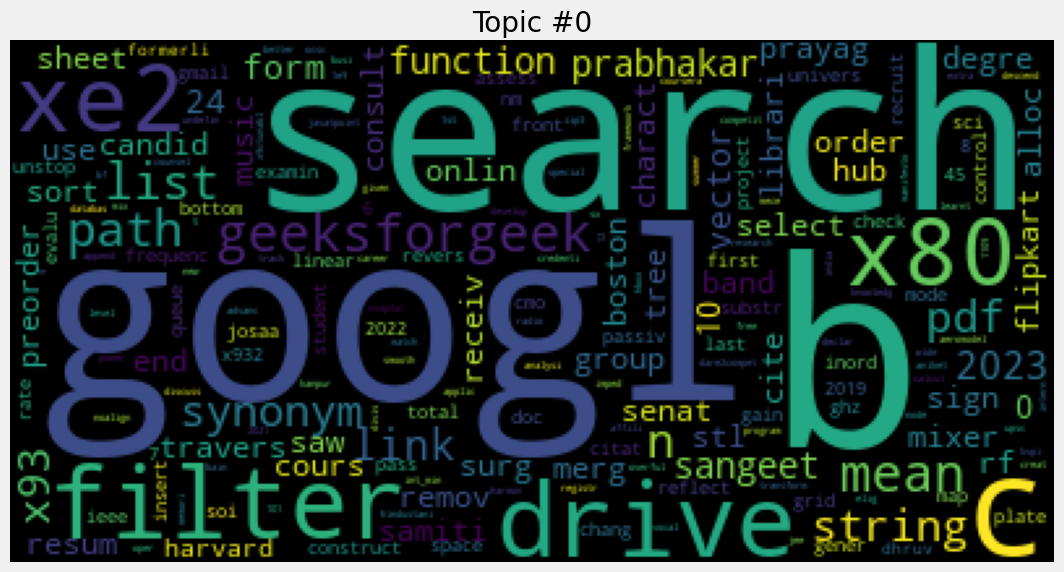

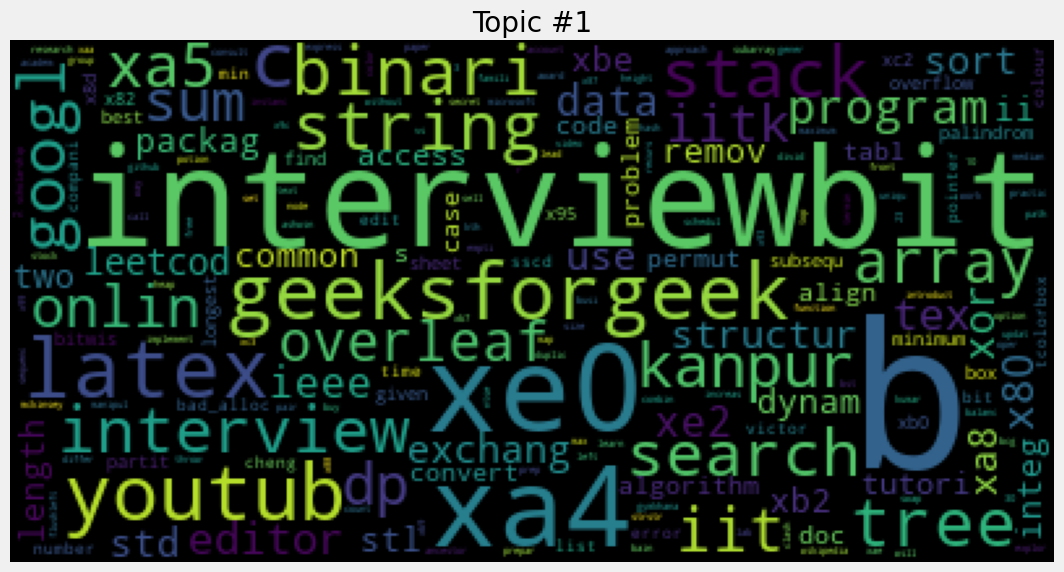

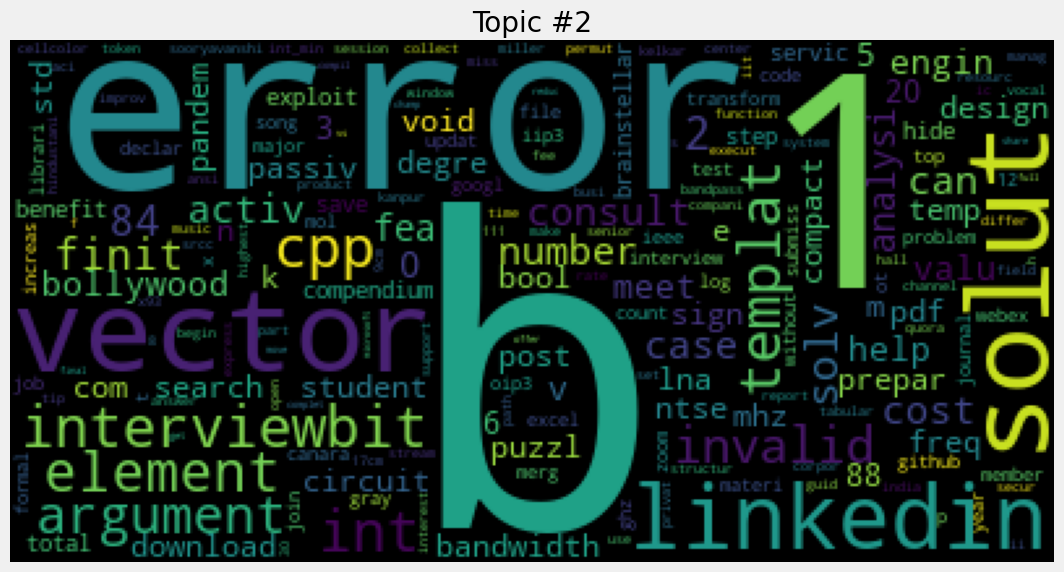

In [35]:
from wordcloud import WordCloud, STOPWORDS

    
for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12,8))
    d={}
    for i in ldamodel.show_topic(t, 200):
        d[i[0]]=i[1]
    plt.imshow(WordCloud().fit_words(d))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

In [36]:
topic = [0]*len(data)
for idx in range(len(data)):
    test_idx = doc_set.index(data.Domain[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [37]:
data['Topic'] = topic

In [38]:
data.head()

,Time,URL,Domain,Topic
0,2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0,b'IIT Kanpur',1
1,2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0/,b'IIT Kanpur',1
2,2023-07-23 07:19:22,https://pingala.iitk.ac.in/IITK-0/OnlinePaymen...,b'HTTP Status 405 \xe2\x80\x93 Method Not Allo...,1
3,2023-07-23 07:19:17,https://payment1.atomtech.in/ots/bank/ru/sbinb...,b'OTS ERROR',2
4,2023-07-23 07:18:33,https://merchant.onlinesbi.sbi/merchant/logins...,Null,2


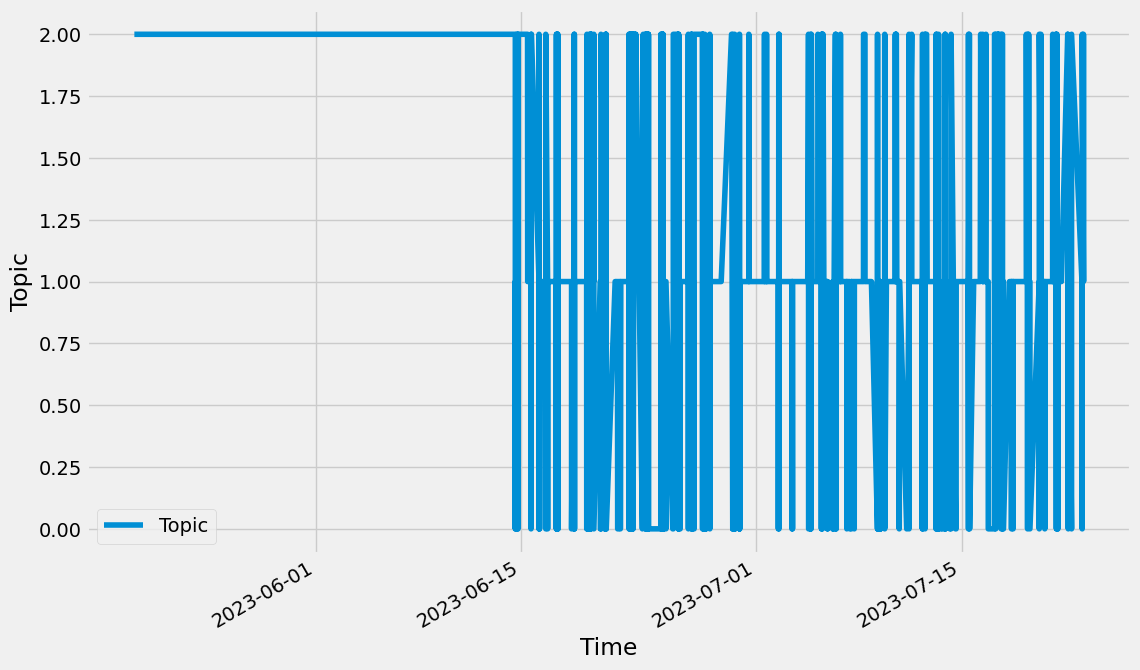

In [39]:
sorted_data = data.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

In [40]:
cp_data = data.copy()

In [41]:
cp_data.head()

,Time,URL,Domain,Topic
0,2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0,b'IIT Kanpur',1
1,2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0/,b'IIT Kanpur',1
2,2023-07-23 07:19:22,https://pingala.iitk.ac.in/IITK-0/OnlinePaymen...,b'HTTP Status 405 \xe2\x80\x93 Method Not Allo...,1
3,2023-07-23 07:19:17,https://payment1.atomtech.in/ots/bank/ru/sbinb...,b'OTS ERROR',2
4,2023-07-23 07:18:33,https://merchant.onlinesbi.sbi/merchant/logins...,Null,2


In [42]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

,URL,Domain,Topic
Time,,,
2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0,b'IIT Kanpur',1
2023-07-23 07:19:40,https://pingala.iitk.ac.in/IITK-0/,b'IIT Kanpur',1
2023-07-23 07:19:22,https://pingala.iitk.ac.in/IITK-0/OnlinePaymen...,b'HTTP Status 405 \xe2\x80\x93 Method Not Allo...,1
2023-07-23 07:19:17,https://payment1.atomtech.in/ots/bank/ru/sbinb...,b'OTS ERROR',2
2023-07-23 07:18:33,https://merchant.onlinesbi.sbi/merchant/logins...,Null,2


In [43]:
'''occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist,bins=[0,1,2,3])
    occurrences.append(list(res[0]))'''

occurrences = []
print(cp_data.index.hour)
weekdays = range(0,24)
for day in weekdays:
    tlist = cp_data[cp_data.index.hour == day].Topic.tolist()
    res = np.histogram(tlist,bins=[0,1,2,3])
    occurrences.append(list(res[0]))

Int64Index([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            17, 16, 16, 14, 14, 14, 14, 14, 14, 14],
           dtype='int64', name='Time', length=3189)


In [44]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

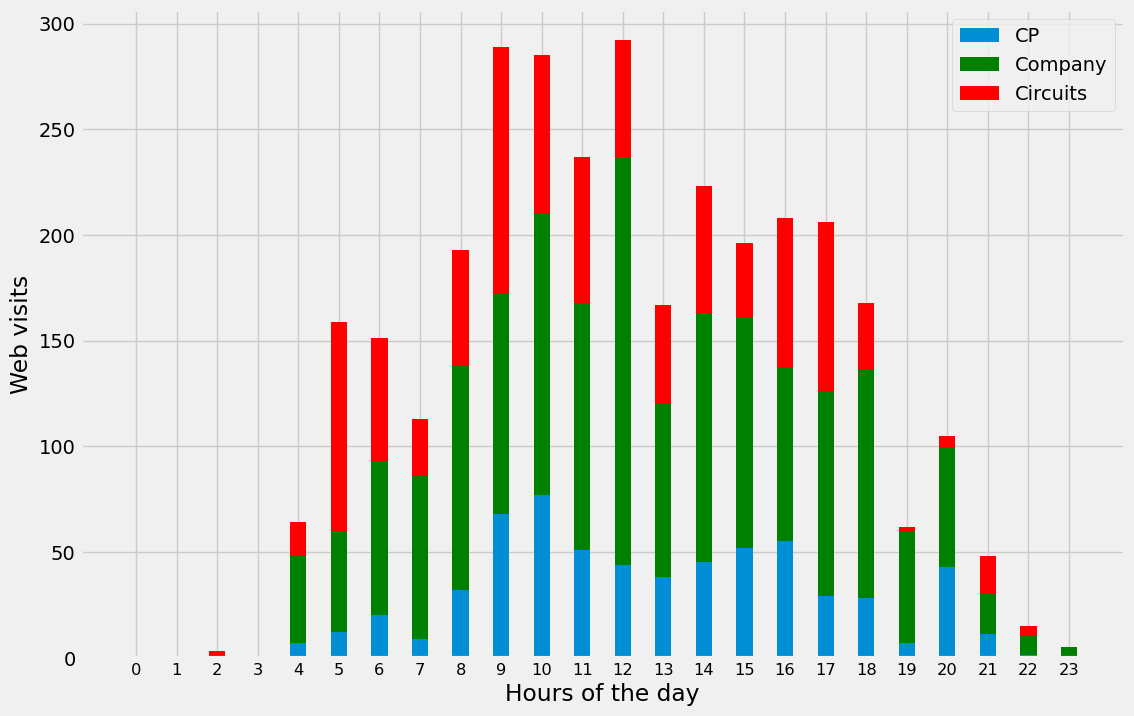

In [45]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(24), t0, 0.4, label='CP')
p1 = plt.bar(range(24), t1, 0.4,bottom=t0, color='green', label='Company')
p2 = plt.bar(range(24), t2, 0.4, bottom=cumt1, color='red', label='Circuits')
plt.xticks(range(24), weekdays, size='small')
plt.xlabel('Hours of the day')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [46]:
import numpy as np
#Used for encoding the data
def prepare(data):
    t=[]
    for time,i in data.iterrows():
        l=[0,0,0]
        l[i.Topic]=time.hour
        t.append(l)
    features=[]
    labels=[]
    for i in range(0,len(t)-5,5):
        features.append(t[i:i+4])
        labels.append(t[i+4])
    return np.asarray(features),labels
        
features,labels=prepare(cp_data)
print(features)
print(labels)

    

[[[ 0  7  0]
  [ 0  7  0]
  [ 0  7  0]
  [ 0  0  7]]

 [[ 0  0  7]
  [ 0  0  7]
  [ 0  0  7]
  [ 0  7  0]]

 [[ 0  7  0]
  [ 0  0  7]
  [ 0  0  5]
  [ 0  0  5]]

 ...

 [[ 0  0  2]
  [ 0  0 22]
  [ 0  0 22]
  [ 0  0 22]]

 [[ 0  0 18]
  [ 0  0 18]
  [ 0  0 17]
  [ 0  0 17]]

 [[ 0  0 16]
  [ 0  0 16]
  [ 0  0 14]
  [ 0  0 14]]]
[[0, 0, 7], [0, 7, 0], [0, 0, 5], [5, 0, 0], [0, 5, 0], [0, 5, 0], [0, 4, 0], [0, 4, 0], [0, 6, 0], [0, 6, 0], [0, 5, 0], [0, 0, 5], [0, 19, 0], [0, 13, 0], [0, 13, 0], [0, 13, 0], [0, 13, 0], [12, 0, 0], [0, 12, 0], [0, 11, 0], [0, 0, 11], [0, 11, 0], [0, 10, 0], [0, 9, 0], [0, 8, 0], [0, 7, 0], [0, 7, 0], [0, 6, 0], [0, 6, 0], [0, 6, 0], [0, 4, 0], [0, 16, 0], [0, 11, 0], [0, 0, 9], [0, 0, 9], [0, 0, 7], [0, 0, 7], [0, 7, 0], [0, 7, 0], [0, 15, 0], [0, 13, 0], [0, 0, 13], [0, 0, 12], [11, 0, 0], [0, 11, 0], [0, 11, 0], [0, 10, 0], [0, 6, 0], [0, 6, 0], [0, 6, 0], [12, 0, 0], [0, 10, 0], [9, 0, 0], [0, 8, 0], [20, 0, 0], [0, 0, 18], [0, 18, 0], [0, 16, 0], [0, 

In [66]:
num=24*10000
label_array=np.zeros((len(features),num))
for idx,widx in enumerate(labels):
    label_array[idx,widx[0]*10000+widx[1]*100+widx[2]*1]=1
def decode(a):
    if(a>10000):
        return 0
    if(a>100):
        return 1
    else:
        return 2

label_array.shape


(637, 240000)

In [67]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()


# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1, input_shape=(4,3)))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(num, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create callbacks
callbacks = [ModelCheckpoint(('../models/model.h5'), save_best_only=True, 
                             save_weights_only=False)]

In [68]:

history = model.fit(features,  label_array, epochs=100,
                    callbacks=callbacks)

Epoch 1/100
20/20 [==============================] - 10s 369ms/step - loss: 12.2969 - accuracy: 0.0644
Epoch 2/100
20/20 [==============================] - 6s 296ms/step - loss: 11.3461 - accuracy: 0.0895
Epoch 3/100
20/20 [==============================] - 6s 294ms/step - loss: 6.6836 - accuracy: 0.0754
Epoch 4/100
20/20 [==============================] - 6s 303ms/step - loss: 3.9024 - accuracy: 0.0581
Epoch 5/100
20/20 [==============================] - 6s 314ms/step - loss: 3.7299 - accuracy: 0.0816
Epoch 6/100
20/20 [==============================] - 7s 349ms/step - loss: 3.6364 - accuracy: 0.0769
Epoch 7/100
20/20 [==============================] - 7s 331ms/step - loss: 3.5940 - accuracy: 0.0863
Epoch 8/100
20/20 [==============================] - 7s 343ms/step - loss: 3.5617 - accuracy: 0.0675
Epoch 9/100
20/20 [==============================] - 7s 345ms/step - loss: 3.5261 - accuracy: 0.0816
Epoch 10/100
20/20 [==============================] - 6s 313ms/step - loss: 3.4807 - acc

In [69]:
output=model.predict([[[0,0,2],[0,0,2],[0,0,2],[0,0,2]]])
print(np.argmax(label_array[np.argmax(output[0])]))
print(decode(np.argmax(label_array[np.argmax(output[0])])))

1/1 [==============================] - 0s 493ms/step
500
1


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm


In [76]:
import pandas as pd
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler

# Define states as unique hours
states = list(set(cp_data.index.hour)) 
d=[]
for i in range(len(cp_data.index.hour)):
    d.append([cp_data.index.hour[i],cp_data.Topic[i]])
# Train HMM on timestamp and topic
d=np.asarray(d)

for i in d:
    i=i.reshape(-1,1)
   # print(i.shape)
#print(d.shape)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(d)
n_observations = scaled_data.shape[0]
n_features = scaled_data.shape[1]
X = scaled_data.reshape((n_observations, n_features))
hmm = hmm.GaussianHMM(n_components=3, covariance_type="diag", n_iter=10000).fit(X)

# Get last observation  
last_obs = X[-2]
print(d[-2])
last_obs= last_obs.reshape((-1,1))

# Predict next state (hour) and observation (topic)
predicted_state = hmm.predict(last_obs)[1]

print(f"Predicted next hour: {predicted_state}")  
print(f"Actual next hour: {d[-1][1]}") 


[14  2]
Predicted next hour: 1
Actual next hour: 2
